In [1]:
# Load necessary libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read csv data
df = pd.read_csv('optimized_transport_data.csv')

In [3]:
# View the first 5 rows of the dataframe
df.head()

,City of Origin,Destination City,Stopover City,Vehicle Plate,Distance (km),Vehicle Type,Speed (km/h),Fuel Consumption (L/100km),Traffic Congestion,Adjusted Speed (km/h),Travel Time (hours),Total Fuel Consumption (L),Peak Time,Off-Peak Time,Free-Flow Speed (km/h),Free-Flow Time (hours),Travel Time Index (TTI)
0,Nairobi,Wau,Juba,NAI-WAU-0000,1868.0,Coupe,125.927097,13.651332,High,105.927097,17.634770,255.006879,21.778187,14.384187,130,14.369231,1.227259
1,Kigali,Butare,NaN,KIG-BUT-0001,125.0,Hybrid,81.799049,11.457496,Medium,81.799049,1.528135,14.321870,1.888021,1.324163,100,1.250000,1.222508
2,Kampala,Kigali,NaN,KAM-KIG-0002,511.0,Saloon,92.434318,8.220312,Medium,92.434318,5.528250,42.005796,6.493618,4.758900,110,4.645455,1.190034
3,Kampala,Juba,NaN,KAM-JUB-0003,653.0,Hybrid,74.577302,9.247005,Medium,74.577302,8.756015,60.382945,11.280711,7.646494,100,6.530000,1.340891
4,Lamu Port,Nairobi,NaN,LAM-NAI-0004,697.0,Hybrid,65.447840,10.155110,Medium,65.447840,10.649702,70.781114,12.071133,7.581773,100,6.970000,1.527934


# Data Dictionary: Sub-Saharan Transport Dataset

This dataset contains 1000 records of vehicle travel data across different cities in Sub-Saharan Africa. It includes information on city pairs, vehicle characteristics, traffic congestion, and travel-related metrics.

## Columns and Descriptions

### **1. City of Origin** (`string`)
   - The starting city of the trip.
   - Example: `"Kigali"`

### **2. Destination City** (`string`)
   - The final city where the vehicle is traveling.
   - Example: `"Butare"`

### **3. Stopover City** (`string, nullable`)
   - An intermediate city where the vehicle may make a stop before reaching the final destination.
   - If no stopover exists, the value is `null`.
   - Example: `"Arusha"` or `null`

### **4. Vehicle Plate** (`string, unique identifier`)
   - A unique identifier for each vehicle in the format: `"XXX-XXX-####"`
   - The first three characters represent the first three letters of the origin city, the next three represent the destination city, followed by a four-digit serial number.
   - Example: `"KIG-BUT-0001"`

### **5. Vehicle Type** (`categorical`)
   - The type of vehicle used for the trip.
   - Possible values:
     - `"SUV"`
     - `"Truck"`
     - `"Saloon"`
     - `"Coupe"`
     - `"Hybrid"`
   - Example: `"Truck"`

### **6. Speed (km/h)** (`float`)
   - The average speed of the vehicle during travel.
   - Speed varies depending on the vehicle type.
   - Example: `85.4`

### **7. Load Weight (tons)** (`float`)
   - The weight of the cargo or passengers carried by the vehicle.
   - Example: `3.2`

### **8. Fuel Consumption (L/100km)** (`float`)
   - The amount of fuel consumed by the vehicle per 100 km.
   - Example: `12.5`

### **9. Traffic Congestion** (`categorical`)
   - The level of traffic congestion during the trip.
   - Possible values:
     - `"Low"`
     - `"Medium"`
     - `"High"`
   - Example: `"High"`

### **10. Driving Distance (km)** (`float`)
   - The precomputed driving distance between the origin and destination city.
   - Derived from Google Maps data.
   - Example: `125.0`

### **11. Travel Time (hours)** (`float`)
   - The estimated time taken to travel based on speed and driving distance.
   - Calculated as:  
     \[
     \text{Travel Time} = \frac{\text{Driving Distance}}{\text{Speed}}
     \]
   - Example: `2.5`

### **12. Adjusted Travel Time (hours)** (`float`)
   - The estimated travel time after accounting for traffic congestion.
   - Speed is adjusted by ±20 km/h based on traffic:
     - `"Low"` congestion: Speed increases by 20 km/h.
     - `"High"` congestion: Speed decreases by 20 km/h.
     - `"Medium"` congestion: No change.
   - Example: `2.8`

### **13. Peak Time Indicator** (`boolean`)
   - Indicates whether the travel occurs during peak hours.
   - Peak hours are derived from the adjusted travel time.
   - `True` if the trip overlaps with typical peak hours, otherwise `False`.
   - Example: `True`

### **14. Off-Peak Time Indicator** (`boolean`)
   - Indicates whether the travel occurs during off-peak hours.
   - Off-peak hours are derived from the adjusted travel time.
   - Example: `False`

### **15. Travel Time Index** (`float`)
   - A measure of traffic efficiency calculated as:
     \[
     \text{Travel Time Index} = \frac{\text{Adjusted Travel Time}}{\text{Travel Time}}
     \]
   - A value greater than `1.0` indicates congestion delays.
   - Example: `1.12`


In [5]:
# Check for Nil values and dtype of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City of Origin              1000 non-null   object 
 1   Destination City            1000 non-null   object 
 2   Stopover City               334 non-null    object 
 3   Vehicle Plate               1000 non-null   object 
 4   Distance (km)               1000 non-null   float64
 5   Vehicle Type                1000 non-null   object 
 6   Speed (km/h)                1000 non-null   float64
 7   Fuel Consumption (L/100km)  1000 non-null   float64
 8   Traffic Congestion          1000 non-null   object 
 9   Adjusted Speed (km/h)       1000 non-null   float64
 10  Travel Time (hours)         1000 non-null   float64
 11  Total Fuel Consumption (L)  1000 non-null   float64
 12  Peak Time                   1000 non-null   float64
 13  Off-Peak Time               1000 n

In [6]:
# Impute the destination city values to the nan stopover rows values

df['Stopover City'].fillna(df['Destination City'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City of Origin              1000 non-null   object 
 1   Destination City            1000 non-null   object 
 2   Stopover City               1000 non-null   object 
 3   Vehicle Plate               1000 non-null   object 
 4   Distance (km)               1000 non-null   float64
 5   Vehicle Type                1000 non-null   object 
 6   Speed (km/h)                1000 non-null   float64
 7   Fuel Consumption (L/100km)  1000 non-null   float64
 8   Traffic Congestion          1000 non-null   object 
 9   Adjusted Speed (km/h)       1000 non-null   float64
 10  Travel Time (hours)         1000 non-null   float64
 11  Total Fuel Consumption (L)  1000 non-null   float64
 12  Peak Time                   1000 non-null   float64
 13  Off-Peak Time               1000 n

In [8]:
# Check the unique values of the Stopover column

unique_stopovers = df["Stopover City"].unique()
print(unique_stopovers)

['Juba' 'Butare' 'Kigali' 'Nairobi' 'Arusha' 'Kisumu' 'Wau'
 'Dar es Salaam' 'Bujumbura' 'Mombasa' 'Kampala' 'Gitega']


### Univariate, Bivariate and Multivariate Analysis


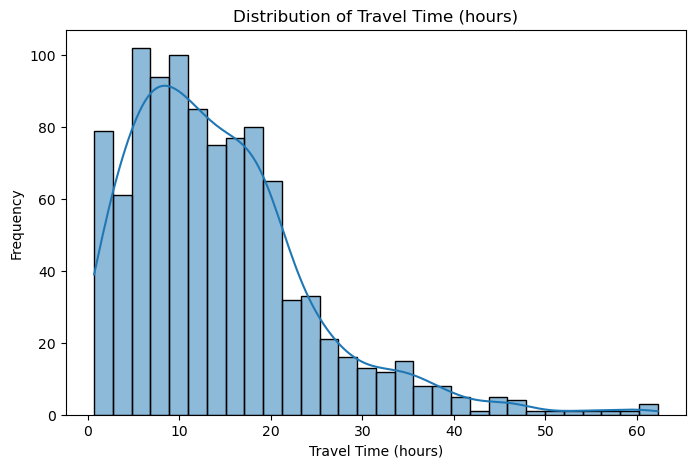

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21556\54707617.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Vehicle Type", palette="coolwarm")


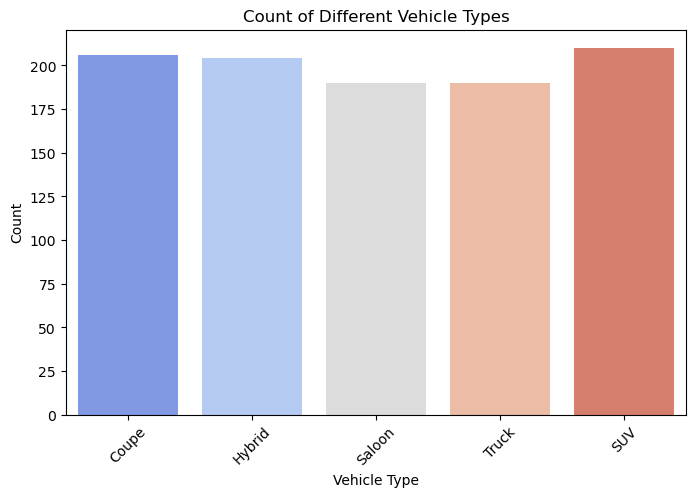

In [10]:
# Distribution of Travel Time (hours)
plt.figure(figsize=(8, 5))
sns.histplot(df["Travel Time (hours)"], bins=30, kde=True)
plt.title("Distribution of Travel Time (hours)")
plt.xlabel("Travel Time (hours)")
plt.ylabel("Frequency")
plt.show()

# Count plot for vehicle types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Vehicle Type", palette="coolwarm")
plt.title("Count of Different Vehicle Types")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

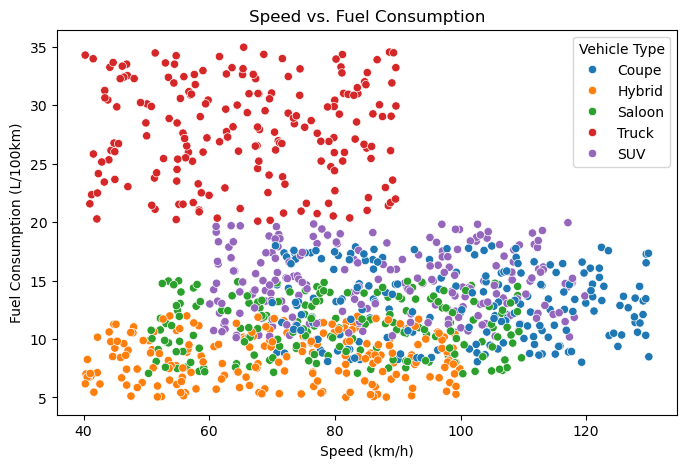

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21556\158382961.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Traffic Congestion", y="Travel Time (hours)", palette="coolwarm")


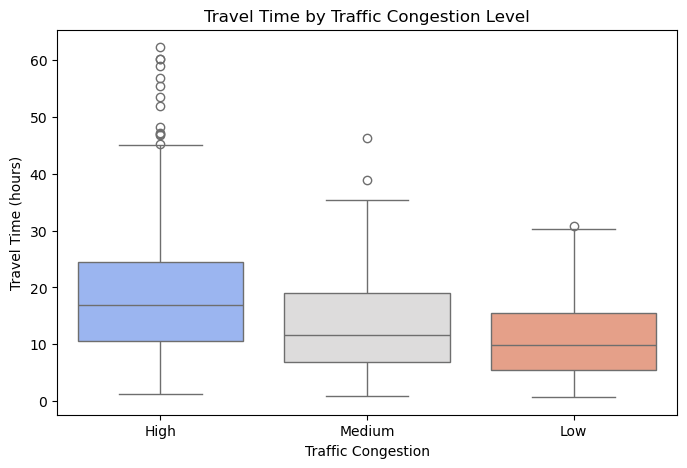

In [11]:
# Scatter plot: Speed vs. Fuel Consumption
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Speed (km/h)", y="Fuel Consumption (L/100km)", hue="Vehicle Type")
plt.title("Speed vs. Fuel Consumption")
plt.xlabel("Speed (km/h)")
plt.ylabel("Fuel Consumption (L/100km)")
plt.show()

# Box plot: Travel Time by Traffic Congestion Level
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Traffic Congestion", y="Travel Time (hours)", palette="coolwarm")
plt.title("Travel Time by Traffic Congestion Level")
plt.xlabel("Traffic Congestion")
plt.ylabel("Travel Time (hours)")
plt.show()

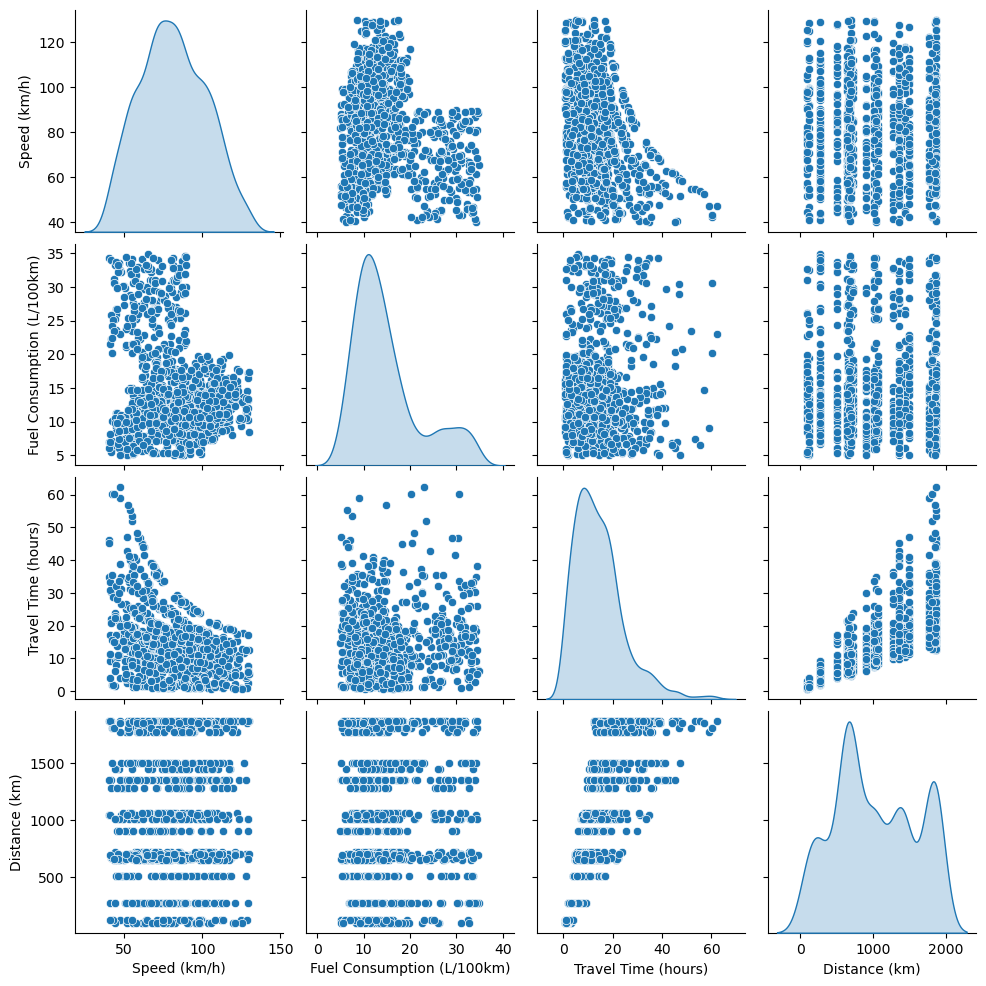

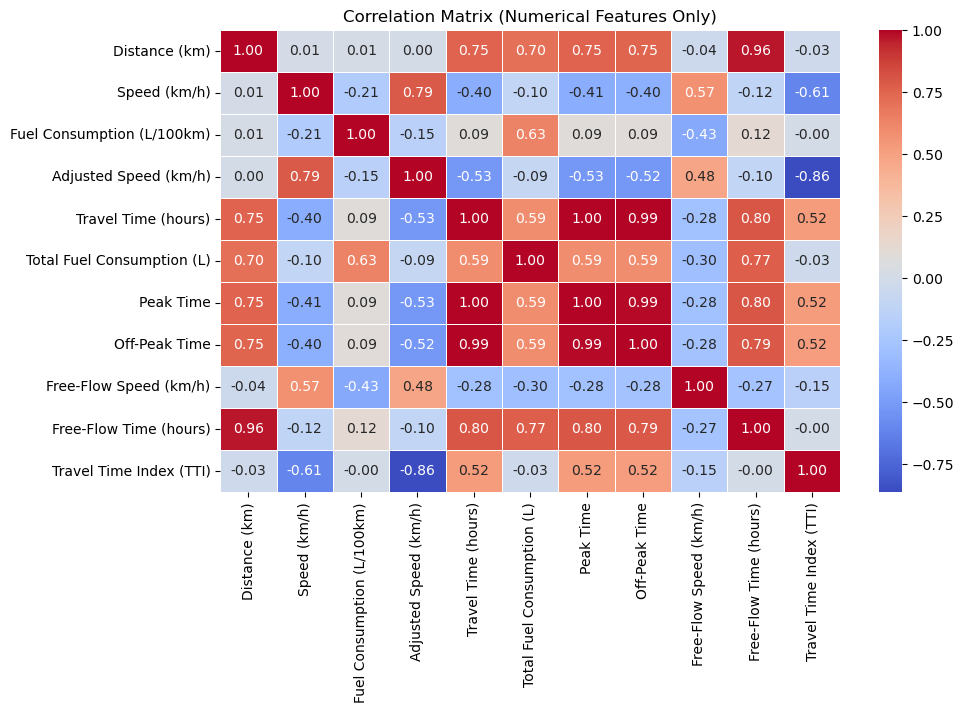

In [12]:
# Pairplot of numerical features
sns.pairplot(df[["Speed (km/h)", "Fuel Consumption (L/100km)", "Travel Time (hours)", "Distance (km)"]], diag_kind="kde")
plt.show()

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

In [13]:
from scipy.stats import skew, kurtosis, shapiro, anderson, normaltest

# Select numerical columns
num_cols = ["Speed (km/h)", "Fuel Consumption (L/100km)", "Travel Time (hours)", "Distance (km)"]

# Create a DataFrame to store test results
results = pd.DataFrame(columns=["Skewness", "Kurtosis", "Shapiro-Wilk p-value", "Anderson-Darling Stat", "D'Agostino p-value"])

for col in num_cols:
    skewness = skew(df[col])
    kurt = kurtosis(df[col])
    shapiro_p = shapiro(df[col])[1]  # Extract p-value
    anderson_stat = anderson(df[col]).statistic
    dagostino_p = normaltest(df[col])[1]  # Extract p-value
    
    results.loc[col] = [skewness, kurt, shapiro_p, anderson_stat, dagostino_p]

# Print results
print(results)


                            Skewness  Kurtosis  Shapiro-Wilk p-value  \
Speed (km/h)                0.139237 -0.720034          1.743589e-08   
Fuel Consumption (L/100km)  1.134332  0.433684          3.007679e-27   
Travel Time (hours)         1.335969  2.607058          4.338456e-24   
Distance (km)               0.107728 -1.166846          1.069524e-21   

                            Anderson-Darling Stat  D'Agostino p-value  
Speed (km/h)                             2.683256        1.592845e-13  
Fuel Consumption (L/100km)              41.993360        1.343252e-33  
Travel Time (hours)                     18.223989        1.105298e-54  
Distance (km)                           22.395960       1.571185e-125  


#### None of the variables follow a normal distribution.
1. Travel Time and Fuel Consumption are highly non-normal, indicating possible outliers or an exponential-like distribution.
2. Distance and Speed are closer to normal but still show deviation.
3. If normality is required for modeling, consider log transformation or Box-Cox transformation to reduce skewness. 🚀

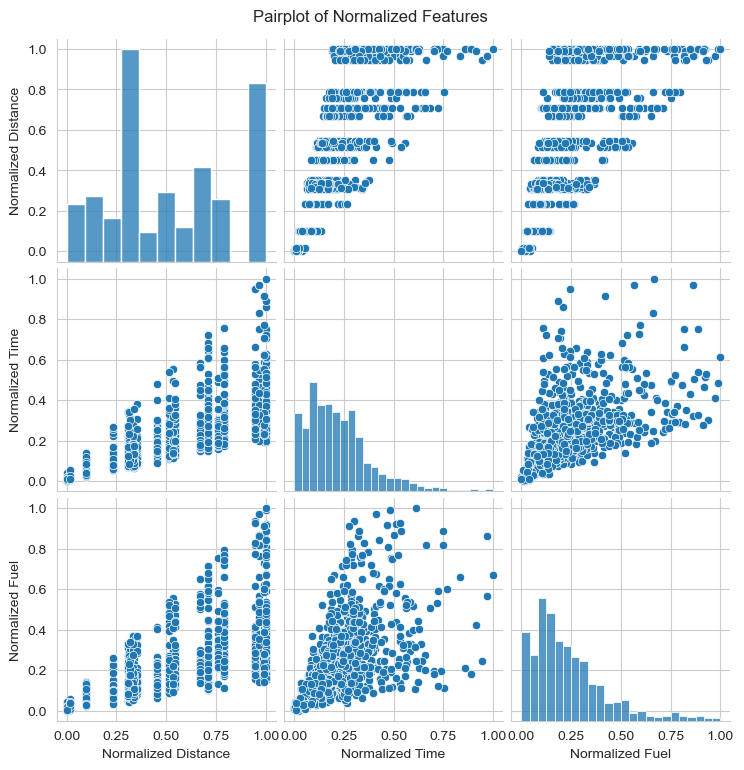

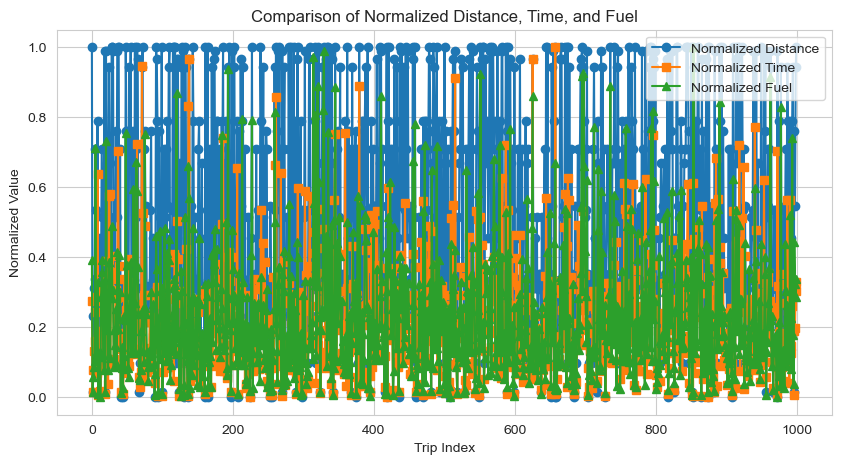

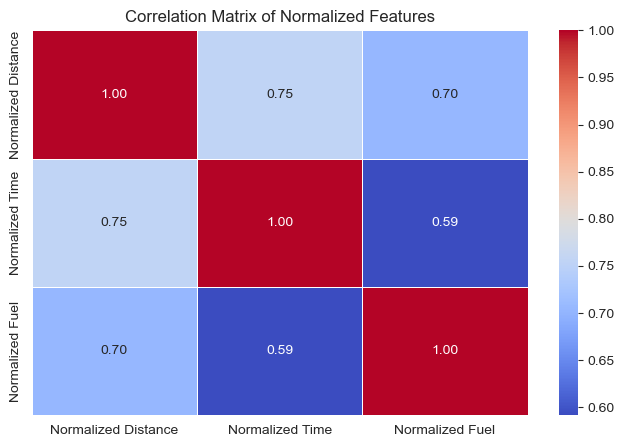

In [15]:
# Feature Engineering for the ACO

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Normalized Distance', 'Normalized Time', 'Normalized Fuel']] = scaler.fit_transform(
    df[['Distance (km)', 'Travel Time (hours)', 'Total Fuel Consumption (L)']]
)

# 📌 Set plot style
sns.set_style("whitegrid")

# 📊 1️⃣ Pairplot to Show Distributions
sns.pairplot(df[['Normalized Distance', 'Normalized Time', 'Normalized Fuel']])
plt.suptitle("Pairplot of Normalized Features", y=1.02)
plt.show()

# 📊 2️⃣ Line Plot to Compare Trends
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Normalized Distance'], label="Normalized Distance", marker='o')
plt.plot(df.index, df['Normalized Time'], label="Normalized Time", marker='s')
plt.plot(df.index, df['Normalized Fuel'], label="Normalized Fuel", marker='^')
plt.xlabel("Trip Index")
plt.ylabel("Normalized Value")
plt.title("Comparison of Normalized Distance, Time, and Fuel")
plt.legend()
plt.show()

# 📊 3️⃣ Heatmap to Show Correlations
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Normalized Distance', 'Normalized Time', 'Normalized Fuel']].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Normalized Features")
plt.show()

Create a Weighted Cost Function for ACO where ACO selects routes based on pheromone trails, which should favor efficient paths.

In [17]:
# Define weights for distance, time, and fuel
ALPHA, BETA, GAMMA = 0.4, 0.2, 0.4

# Compute Edge Score based on distance, time, and fuel efficiency
df['Edge Score'] = (
    ALPHA * df['Normalized Distance'] +
    BETA * df['Normalized Time'] +
    GAMMA * df['Normalized Fuel']
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City of Origin              1000 non-null   object 
 1   Destination City            1000 non-null   object 
 2   Stopover City               1000 non-null   object 
 3   Vehicle Plate               1000 non-null   object 
 4   Distance (km)               1000 non-null   float64
 5   Vehicle Type                1000 non-null   object 
 6   Speed (km/h)                1000 non-null   float64
 7   Fuel Consumption (L/100km)  1000 non-null   float64
 8   Traffic Congestion          1000 non-null   object 
 9   Adjusted Speed (km/h)       1000 non-null   float64
 10  Travel Time (hours)         1000 non-null   float64
 11  Total Fuel Consumption (L)  1000 non-null   float64
 12  Peak Time                   1000 non-null   float64
 13  Off-Peak Time               1000 n

Construct a graph where each city is a node and each route is an edge with Edge Score as the weight.

In [19]:
import networkx as nx

# Create a Graph using networkx
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['City of Origin'], row['Destination City'], weight=row['Edge Score'])


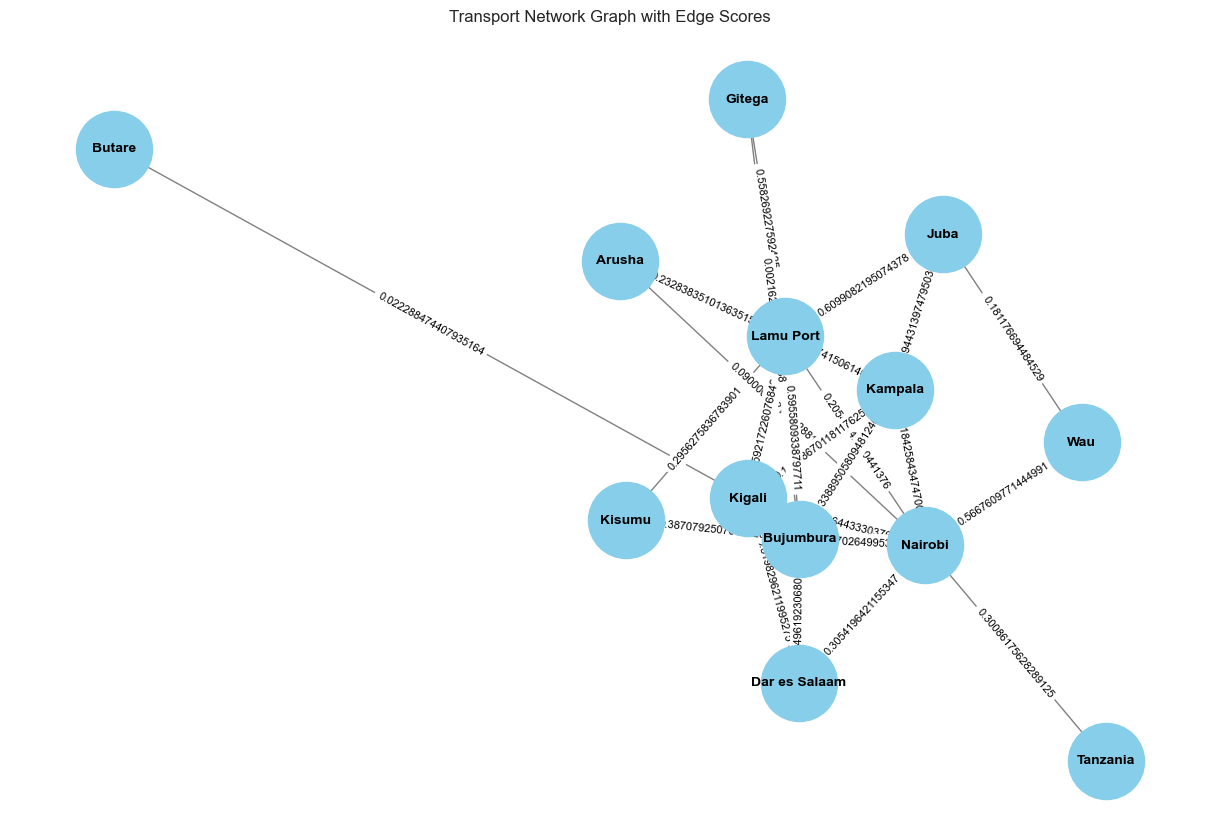

{('Nairobi', 'Wau'): 0.5667609771444991, ('Nairobi', 'Lamu Port'): 0.20546842540441376, ('Nairobi', 'Kigali'): 0.45950166443330376, ('Nairobi', 'Tanzania'): 0.30086175628289125, ('Nairobi', 'Dar es Salaam'): 0.3054196421155347, ('Nairobi', 'Kampala'): 0.21842584347470007, ('Nairobi', 'Bujumbura'): 0.3787026499537684, ('Nairobi', 'Arusha'): 0.09000007216002881, ('Wau', 'Juba'): 0.181176694484529, ('Kigali', 'Butare'): 0.022288474407935164, ('Kigali', 'Kampala'): 0.14688670118117625, ('Kigali', 'Dar es Salaam'): 0.5198296211995275, ('Kigali', 'Bujumbura'): 0.0701541561511341, ('Kigali', 'Lamu Port'): 0.5921722607684283, ('Kampala', 'Juba'): 0.19443139747950394, ('Kampala', 'Bujumbura'): 0.33889505809481246, ('Kampala', 'Lamu Port'): 0.37741506140917, ('Juba', 'Lamu Port'): 0.6099082195074378, ('Lamu Port', 'Kisumu'): 0.2956275836783901, ('Lamu Port', 'Gitega'): 0.558269227592425, ('Lamu Port', 'Bujumbura'): 0.5955809338797711, ('Lamu Port', 'Arusha'): 0.23283835101363515, ('Kisumu', 'Buj

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a layout for better spacing
pos = nx.spring_layout(G, seed=42)  # Adjust layout for clear visualization

# Draw the network graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")

# Get edge weights
edge_weights = nx.get_edge_attributes(G, 'weight')

# Draw edge labels (Edge Score)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=8)

plt.title("Transport Network Graph with Edge Scores")
plt.show()
print(edge_weights)


ACO Model Prediction Error: inf
✅ ACO Model saved as 'aco_model.pkl'
Best Path: Nairobi → Wau → Juba → Kampala → Kigali → Bujumbura → Gitega


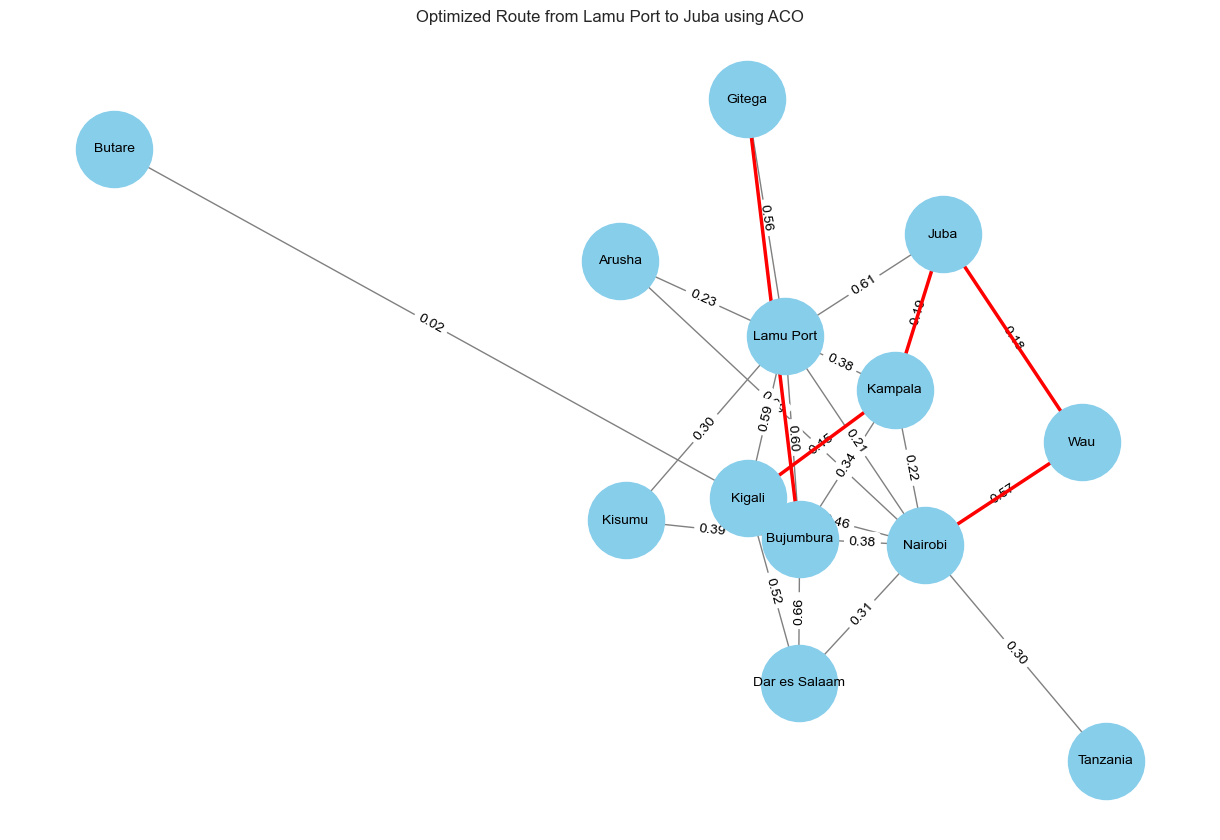

In [21]:
import pickle
import random
import numpy as np


# Extract edge weights
edge_weights = nx.get_edge_attributes(G, 'weight')

# Load Edge Weights and Data
edge_weights = nx.get_edge_attributes(G, 'weight')

# 🚀 **ACO Parameters**
NUM_ANTS = 10
NUM_ITERATIONS = 100
EVAPORATION_RATE = 0.5
PHEROMONE_INIT = 1.0
Q = 1.0  # Pheromone deposit factor

# Initialize Pheromone and Heuristic Matrices
pheromones = {edge: PHEROMONE_INIT for edge in edge_weights}
heuristic = {edge: 1 / weight for edge, weight in edge_weights.items()}  # Heuristic Function

# 🐜 **Ant Colony Optimization**
def ant_colony_optimization(start, end):
    """ACO algorithm to find the best route between cities."""
    best_path = None
    best_cost = float('inf')

    for _ in range(NUM_ITERATIONS):
        paths, costs = [], []

        for _ in range(NUM_ANTS):
            path, cost = construct_solution(start, end)
            paths.append(path)
            costs.append(cost)

            if cost < best_cost:
                best_path = path
                best_cost = cost

        update_pheromones(paths, costs)  

    return best_path, best_cost

# 🔹 **Construct a Path Using Probabilities**
def construct_solution(start, end):
    path, current_city, total_cost = [start], start, 0

    while current_city != end:
        neighbors = [n for n in G.neighbors(current_city) if n not in path]
        if not neighbors:
            return path, float('inf')  # Dead-end, return high cost

        # Compute Probabilities
        probabilities = []
        for neighbor in neighbors:
            edge = (current_city, neighbor) if (current_city, neighbor) in pheromones else (neighbor, current_city)
            tau, eta = pheromones[edge] ** ALPHA, heuristic[edge] ** BETA
            probabilities.append(tau * eta)

        probabilities = np.array(probabilities) / sum(probabilities)
        next_city = np.random.choice(neighbors, p=probabilities)

        path.append(next_city)
        total_cost += edge_weights.get((current_city, next_city), edge_weights.get((next_city, current_city), float('inf')))
        current_city = next_city

    return path, total_cost

# 🔹 **Update Pheromones**
def update_pheromones(paths, costs):
    global pheromones
    for edge in pheromones:
        pheromones[edge] *= (1 - EVAPORATION_RATE)  # Evaporation

    for path, cost in zip(paths, costs):
        for i in range(len(path) - 1):
            edge = (path[i], path[i+1]) if (path[i], path[i+1]) in pheromones else (path[i+1], path[i])
            pheromones[edge] += Q / cost  # Deposit Pheromone

# 🚀 **Train-Test Split for Evaluation**
random.seed(42)
city_pairs = list(edge_weights.keys())
random.shuffle(city_pairs)
split_idx = int(0.8 * len(city_pairs))
train_pairs, test_pairs = city_pairs[:split_idx], city_pairs[split_idx:]

# 🏆 **Evaluate ACO Model**
total_error = 0
for (start, end) in test_pairs:
    predicted_path, predicted_cost = ant_colony_optimization(start, end)
    actual_cost = edge_weights.get((start, end), float('inf'))
    if actual_cost == float('inf'):
        continue  
    error = abs(predicted_cost - actual_cost) / actual_cost
    total_error += error

print(f"ACO Model Prediction Error: {total_error / len(test_pairs):.4f}")

# ✅ **Save the Trained ACO Model**
with open('aco_model.pkl', 'wb') as model_file:
    pickle.dump((pheromones, heuristic, edge_weights, G), model_file)  # Save Pheromones and Graph

print("✅ ACO Model saved as 'aco_model.pkl'")

# 🚀 **Run ACO Example**
best_route, best_distance = ant_colony_optimization("Nairobi", "Gitega")
print("Best Path:", " → ".join(best_route))

# 🚀 **Visualize Best Route**
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", edge_color="gray", font_size=10)

# Draw edge weights
edge_labels = {(u, v): f"{d:.2f}" for u, v, d in G.edges(data="weight")}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Highlight Best Path
path_edges = [(best_route[i], best_route[i+1]) for i in range(len(best_route) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2.5)

plt.title("Optimized Route from Lamu Port to Juba using ACO")
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import networkx as nx

# Test city pairs (Ensure they exist in edge_weights)
test_pairs = [
    ('Bujumbura', 'Nairobi'),
    ('Kigali', 'Juba'),
    ('Dar es Salaam', 'Kampala'),
    ('Nairobi', 'Juba'),
    ('Kampala', 'Butare')
]

from sklearn.metrics import mean_squared_error

# 1️⃣ Ensure test pairs exist in edge_weights
filtered_test_pairs = [pair for pair in test_pairs if pair in edge_weights]

# 2️⃣ Extract actual distances safely
actual_distances = [edge_weights.get(pair) for pair in filtered_test_pairs]

# 3️⃣ Ensure there are no None values
actual_distances = [dist for dist in actual_distances if dist is not None]

# 4️⃣ Generate predicted distances based on best path
predicted_distances = (
    [best_distance / len(best_route)] * len(actual_distances) if best_route else [0] * len(actual_distances)
)

# 5️⃣ Ensure lists are not empty before computing MSE
if len(actual_distances) > 0 and len(predicted_distances) > 0:
    mse = mean_squared_error(actual_distances, predicted_distances)
else:
    mse = None
    print("⚠️ Warning: No valid test pairs found in edge_weights. MSE cannot be calculated.")

# 6️⃣ Display MSE result
if mse is not None:
    print(f"Mean Squared Error (MSE): {mse:.4f}")



⚠️ Warning: No valid test pairs found in edge_weights. MSE cannot be calculated.


In [23]:
# Define average payload capacities in pounds
payload_capacities = {
    'SUV': 1750,      # Average of 1,500 to 2,000 pounds
    'Truck': 1600,    # Example from Honda Ridgeline
    'Saloon': 900,    # Average of 800 to 1,000 pounds
    'Coupe': 800,
    'Hybrid': 1000,   # Example from Honda CR-V Hybrid
}

# Function to assign load weight based on vehicle type
def assign_load_weight(vehicle_type):
    avg_payload = payload_capacities.get(vehicle_type, 1000)  # Default to 1000 if type is unknown
    # Simulate actual load as a percentage of the payload capacity (e.g., 50% to 100%)
    load_percentage = np.random.uniform(0.5, 1.0)
    return avg_payload * load_percentage

# Apply the function to assign load weights
df['Load Weight (pounds)'] = df['Vehicle Type'].apply(assign_load_weight)

# Display the updated DataFrame
print(df)

    City of Origin Destination City Stopover City Vehicle Plate  \
0          Nairobi              Wau          Juba  NAI-WAU-0000   
1           Kigali           Butare        Butare  KIG-BUT-0001   
2          Kampala           Kigali        Kigali  KAM-KIG-0002   
3          Kampala             Juba          Juba  KAM-JUB-0003   
4        Lamu Port          Nairobi       Nairobi  LAM-NAI-0004   
..             ...              ...           ...           ...   
995         Kigali           Butare        Butare  KIG-BUT-0995   
996  Dar es Salaam           Kigali        Kigali  DAR-KIG-0996   
997      Bujumbura           Kisumu        Kisumu  BUJ-KIS-0997   
998      Lamu Port           Gitega        Arusha  LAM-GIT-0998   
999      Lamu Port        Bujumbura        Arusha  LAM-BUJ-0999   

     Distance (km) Vehicle Type  Speed (km/h)  Fuel Consumption (L/100km)  \
0           1868.0        Coupe    125.927097                   13.651332   
1            125.0       Hybrid     81.79

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City of Origin              1000 non-null   object 
 1   Destination City            1000 non-null   object 
 2   Stopover City               1000 non-null   object 
 3   Vehicle Plate               1000 non-null   object 
 4   Distance (km)               1000 non-null   float64
 5   Vehicle Type                1000 non-null   object 
 6   Speed (km/h)                1000 non-null   float64
 7   Fuel Consumption (L/100km)  1000 non-null   float64
 8   Traffic Congestion          1000 non-null   object 
 9   Adjusted Speed (km/h)       1000 non-null   float64
 10  Travel Time (hours)         1000 non-null   float64
 11  Total Fuel Consumption (L)  1000 non-null   float64
 12  Peak Time                   1000 non-null   float64
 13  Off-Peak Time               1000 n

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def train_vehicle_model(df):
    """Trains a Random Forest model to classify vehicle type based on travel data."""
    X = df[["Speed (km/h)", "Fuel Consumption (L/100km)", "Travel Time (hours)", "Distance (km)", "Load Weight (pounds)"]]
    y = df["Vehicle Type"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    print("Model Accuracy:", accuracy_score(y_test, model.predict(X_test)))
    print(classification_report(y_test, model.predict(X_test)))
    return model

def get_user_input():
    """Gets user input for start city, destination, and load weight."""
    start = input("Enter starting city: ").strip()
    destination = input("Enter destination city: ").strip()
    try:
        load_weight = float(input("Enter load weight (kg): ").strip())
        return start, destination, load_weight
    except ValueError:
        print("Invalid load weight! Please enter a numeric value.")
        return None, None, None

def find_best_route(G, edge_weights, start, destination):
    """Finds the best route between two cities using shortest path."""
    try:
        path = nx.shortest_path(G, source=start, target=destination, weight='weight')
        total_distance = df[(df["City of Origin"] == start) & (df["Destination City"] == destination)]["Distance (km)"].unique()
        #The above function seems to add all the similar values that meet the distance requirement of both conditions. I need 
        #to change that by using the unique instead of the sum
        return path, total_distance
    except (nx.NetworkXNoPath, nx.NodeNotFound):
        print("No valid route found. Check the city names!")
        return None, None

def rank_vehicles(df, model, total_distance, load_weight):
    """Ranks vehicles based on fuel efficiency, load capacity, and ML model prediction."""
    avg_fuel_efficiency = df.groupby('Vehicle Type')['Fuel Consumption (L/100km)'].mean()
    estimated_fuel_needed = total_distance * avg_fuel_efficiency / 100
    
    vehicle_load_capacity = {'SUV': 600, 'Truck': 5000, 'Saloon': 400, 'Coupe': 300, 'Hybrid': 500}
    suitable_vehicles = {v: c for v, c in vehicle_load_capacity.items() if c >= load_weight}
    
    if not suitable_vehicles:
        print("No suitable vehicle for this load weight.")
        return []
    
    # Predict vehicle type using ML model
    features = np.array([[total_distance, load_weight, estimated_fuel_needed.mean(), 0, 0]])  # Add placeholders for missing features
    predicted_vehicle = model.predict(features)[0]
    
    # Rank vehicles by fuel efficiency and load capacity
    sorted_by_fuel = sorted(suitable_vehicles.keys(), key=lambda v: avg_fuel_efficiency.get(v, float('inf')))
    sorted_by_capacity = sorted(suitable_vehicles.keys(), key=lambda v: -vehicle_load_capacity[v])
    
    # Get top 3 recommendations
    return list(dict.fromkeys([predicted_vehicle] + sorted_by_fuel + sorted_by_capacity))[:3]

def plot_route(G, best_path, top_vehicles):
    """Plots the best route on the graph."""
    plt.figure(figsize=(8,6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=1500, font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=[(best_path[i], best_path[i+1]) for i in range(len(best_path)-1)], edge_color='red', width=2.5)
    plt.title(f"Best Route: {' → '.join(best_path)}\nTop Vehicles: {', '.join(top_vehicles)}")
    plt.show()

def recommend_top_vehicles(model, df, edge_weights, G):
    """Combines all steps to recommend the best vehicles for a journey."""
    start, destination, load_weight = get_user_input()
    if not start or not destination:
        return
    best_path, total_distance = find_best_route(G, edge_weights, start, destination)
    if not best_path:
        return
    top_vehicles = rank_vehicles(df, model, total_distance, load_weight)
    if not top_vehicles:
        return
    plot_route(G, best_path, top_vehicles)
    print(f"Best Route: {' → '.join(best_path)}")
    total_distance = df[(df["City of Origin"] == start) & (df["Destination City"] == end)]["Distance (km)"].sum()
    print(f"Total Distance: {total_distance:.2f} km")
    print(f"🚗 Recommended Vehicles (ranked): {', '.join(top_vehicles)}")


In [29]:
# Usage
model = train_vehicle_model(df)
recommend_top_vehicles(model, df, edge_weights, G)

Model Accuracy: 0.83
              precision    recall  f1-score   support

       Coupe       0.88      0.76      0.81        37
      Hybrid       0.58      0.91      0.71        34
         SUV       1.00      1.00      1.00        44
      Saloon       0.67      0.42      0.52        38
       Truck       1.00      1.00      1.00        47

    accuracy                           0.83       200
   macro avg       0.83      0.82      0.81       200
weighted avg       0.84      0.83      0.82       200



Enter starting city:  Nairobi
Enter destination city:  Kigali
Enter load weight (kg):  300


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1, 5) + inhomogeneous part.

In [ ]:
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)